In [1]:
import numpy as np
import pandas as pd
import scanpy.api as sc
import timeit
import Cluster_Ensembles as CE
from functools import reduce
start_time=timeit.default_timer()
import anndata as ad
print(ad.__version__)
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


0.6.1
scanpy==1.0.4 anndata==0.6.1 numpy==1.14.3 scipy==1.1.0 pandas==0.23.0 scikit-learn==0.19.1 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
path = '/home/ehamilton/ProjectSummer2018/GRCh38/AO/'
AO =ad.read_csv(path + 'AO_leukemia_simulations_annot_100cells2.csv', delimiter= None, first_column_names=None, dtype='float32')

In [3]:
AO.var_names_make_unique

<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 10000 × 81 >

In [4]:
mito_genes = [name for name in AO.var_names if name.startswith('MT-')]
AO.obs['percent_mito']=np.sum( AO[:, mito_genes].X, axis=1)/ np.sum(AO.X, axis=1)
AO.obs['n_counts']= AO.X.sum(axis=1)

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


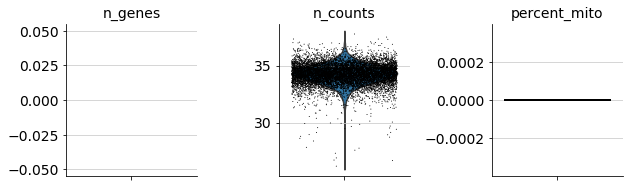

In [5]:
sc.pl.violin(AO, ['n_genes','n_counts','percent_mito'], jitter=0.4, multi_panel=True)

In [6]:
sc.pp.normalize_per_cell(AO, counts_per_cell_after=20000)

In [7]:
AO.raw = sc.pp.log1p(AO, copy=True)

In [8]:
sc.tl.pca(AO)

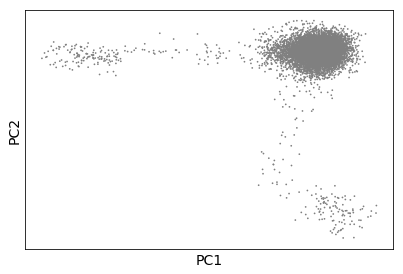

In [9]:
AO.obsm['X_pca'] *=-1
sc.pl.pca_scatter(AO)

In [10]:
sc.tl.tsne(AO, random_state=2, n_pcs=10)

computing tSNE
    using 'X_pca' with n_pcs = 10
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:01:03.25) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


In [11]:
import MulticoreTSNE

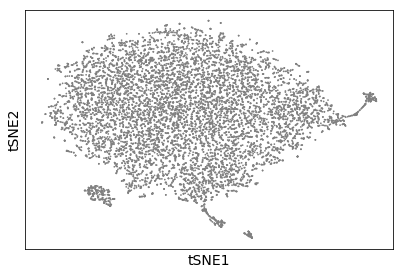

In [12]:
sc.pl.tsne(AO)

In [13]:
from sklearn.cluster import Birch
import numpy as np

In [14]:
brc = Birch(branching_factor=50, n_clusters=6, threshold=0.5, 
            compute_labels=True)

In [15]:
brc.fit(AO.X)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=6,
   threshold=0.5)

In [16]:
brc.predict(AO.X)

array([2, 2, 2, ..., 2, 2, 0])

In [17]:
print(brc.predict(AO.X))

[2 2 2 ... 2 2 0]


In [18]:
df = pd.DataFrame(brc.predict(AO.X))
df.columns=['Birch']
df

,Birch
0,2
1,2
2,2
3,2
4,2
5,2
6,2
7,2
8,2
9,2


In [19]:
icantbelievethatworked = pd.merge(AO.obs, AO.obs)

In [20]:
AOBirch = pd.concat([icantbelievethatworked, df], axis=1, join='inner')

In [21]:
path = '/home/ehamilton/ProjectSummer2018/GRCh38/AO/'
Sim =ad.read_csv(path + 'srep24307-s3.csv', delimiter= '\t', first_column_names=True)
Sim = Sim.T

In [22]:
Sim.var_names_make_unique

<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 18 × 81 >

In [23]:
print(Sim)

AnnData object with n_obs × n_vars = 18 × 81 


In [24]:
Sim.var_names_make_unique

<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 18 × 81 >

In [25]:
mito_genes = [name for name in Sim.var_names if name.startswith('MT-')]
Sim.obs['percent_mito']=np.sum( Sim[:, mito_genes].X, axis=1)/ np.sum(Sim.X, axis=1)
Sim.obs['n_counts']= Sim.X.sum(axis=1)

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


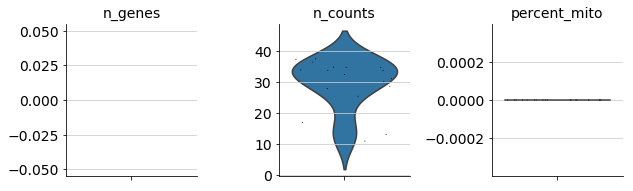

In [26]:
sc.pl.violin(Sim, ['n_genes','n_counts','percent_mito'], jitter=0.4, multi_panel=True)

In [27]:
sc.pp.normalize_per_cell(Sim, counts_per_cell_after=20000)

In [28]:
Sim.raw = sc.pp.log1p(Sim, copy=True)

In [29]:
sc.tl.pca(Sim)

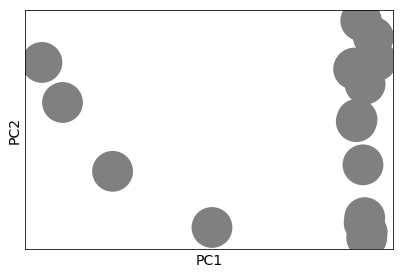

In [30]:
Sim.obsm['X_pca'] *=-1
sc.pl.pca_scatter(Sim)

In [31]:
sc.tl.tsne(Sim, random_state=2, n_pcs=10)

computing tSNE
    using 'X_pca' with n_pcs = 10
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:00:00.02) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


In [32]:
import MulticoreTSNE

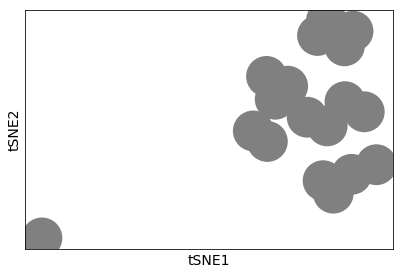

In [33]:
sc.pl.tsne(Sim)

In [34]:
brc = Birch(branching_factor=50, n_clusters=6, threshold=0.5, 
            compute_labels=True)

In [35]:
brc.fit(Sim.X)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=6,
   threshold=0.5)

In [36]:
brc.predict(Sim.X)

array([0, 0, 4, 4, 0, 0, 2, 2, 4, 0, 0, 3, 1, 5, 1, 2, 2, 0])

In [37]:
print(brc.predict(Sim.X))

[0 0 4 4 0 0 2 2 4 0 0 3 1 5 1 2 2 0]


In [38]:
df = pd.DataFrame(brc.predict(Sim.X))
df.columns=['Birch']
df

,Birch
0,0
1,0
2,4
3,4
4,0
5,0
6,2
7,2
8,4
9,0


In [39]:
icantbelievethatworked = pd.merge(Sim.obs, Sim.obs)

In [40]:
SimBirch = pd.concat([icantbelievethatworked, df], axis=1, join='inner')

In [41]:
AOBirch

,percent_mito,n_counts,Birch
0,0.0,34.740082,2
1,0.0,34.740082,2
2,0.0,34.740082,2
3,0.0,34.740082,2
4,0.0,34.740082,2
5,0.0,34.740082,2
6,0.0,34.740082,2
7,0.0,34.740082,2
8,0.0,34.740082,2
9,0.0,34.740082,2


In [42]:
AOCluster1 = AOBirch.loc[AOBirch['Birch'] == 0]

In [43]:
AOCluster1['index1'] = AOCluster1.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
AOCluster1 = AOCluster1['index1'].tolist()

In [45]:
AOCluster1 = AO[AOCluster1, :]
AOCluster1.X

ArrayView([[488.6023  , 503.60843 , 573.9693  , ...,  90.86861 ,
            526.77325 ,  47.158524],
           [520.6285  , 512.68134 , 534.6829  , ...,  52.24311 ,
            493.32642 ,  42.733192],
           [565.56366 , 576.64014 , 562.1979  , ...,  20.150043,
            468.80057 ,  84.13744 ],
           ...,
           [502.70813 , 372.7083  , 473.0292  , ...,  96.765114,
            474.42575 ,  94.32374 ],
           [521.6488  , 496.50302 , 530.5745  , ...,  18.969933,
            518.15717 ,  91.49043 ],
           [529.7581  , 499.11783 , 374.49554 , ...,  23.383299,
            440.7138  ,  63.470074]], dtype=float32)

In [46]:
AOCluster2 = AOBirch.loc[AOBirch['Birch'] == 1]

In [47]:
AOCluster2['index2'] = AOCluster2.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
AOCluster2 = AOCluster2['index2'].tolist()

In [49]:
AOCluster2 = AO[AOCluster2, :]
AOCluster2.X

ArrayView([[591.54095 , 523.00073 , 543.0003  , ..., 145.38718 ,
            466.88092 , 146.92604 ],
           [582.1649  , 507.44073 , 549.2492  , ..., 119.394424,
            488.8258  , 108.70693 ],
           [525.2955  , 532.34924 , 495.4253  , ..., 109.398605,
            447.59464 , 100.44337 ],
           ...,
           [472.1351  , 512.08704 , 432.11777 , ...,  95.527695,
            419.755   ,  18.492945],
           [579.83    , 466.89038 , 445.60297 , ...,  16.451624,
            523.46783 ,  77.089935],
           [473.08722 , 481.02386 , 517.30444 , ...,   9.406659,
            493.36728 ,  54.625168]], dtype=float32)

In [50]:
AOCluster3 = AOBirch.loc[AOBirch['Birch'] == 2]

In [51]:
AOCluster3['index3'] = AOCluster3.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
AOCluster3 = AOCluster3['index3'].tolist()

In [53]:
AOCluster3 = AO[AOCluster3, :]

In [54]:
AOCluster4 = AOBirch.loc[AOBirch['Birch'] == 3]

In [55]:
AOCluster4['index4'] = AOCluster4.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
AOCluster4 = AOCluster4['index4'].tolist()

In [57]:
AOCluster4 = AO[AOCluster4, :]

In [58]:
AOCluster5 = AOBirch.loc[AOBirch['Birch'] == 4]

In [59]:
AOCluster5['index5'] = AOCluster5.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
AOCluster5 = AOCluster5['index5'].tolist()

In [61]:
AOCluster5 = AO[AOCluster5, :]

In [62]:
AOCluster6 = AOBirch.loc[AOBirch['Birch'] == 5]

In [63]:
AOCluster6['index6'] = AOCluster6.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
AOCluster6 = AOCluster6['index6'].tolist()

In [65]:
AOCluster6 = AO[AOCluster6, :]

In [66]:
SimCluster1 = SimBirch.loc[SimBirch['Birch'] == 0]

In [67]:
SimCluster1['index7'] = SimCluster1.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
SimCluster1 = SimCluster1['index7'].tolist()

In [69]:
SimCluster1 = Sim[SimCluster1, :]

In [70]:
SimCluster2 = SimBirch.loc[SimBirch['Birch'] == 1]

In [71]:
SimCluster2['index8'] = SimCluster2.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
SimCluster2 = SimCluster2['index8'].tolist()

In [73]:
SimCluster2 = Sim[SimCluster2, :]

In [74]:
SimCluster3 = SimBirch.loc[SimBirch['Birch'] == 2]

In [75]:
SimCluster3['index9'] = SimCluster3.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
SimCluster3 = SimCluster3['index9'].tolist()

In [77]:
SimCluster3 = Sim[SimCluster3, :]

In [78]:
SimCluster4 = SimBirch.loc[SimBirch['Birch'] == 3]

In [79]:
SimCluster4['index10'] = SimCluster4.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
SimCluster4 = SimCluster4['index10'].tolist()

In [81]:
SimCluster4 = Sim[SimCluster4, :]

In [82]:
SimCluster5 = SimBirch.loc[SimBirch['Birch'] == 4]

In [83]:
SimCluster5['index11'] = SimCluster5.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [84]:
SimCluster5 = SimCluster5['index11'].tolist()

In [85]:
SimCluster5 = Sim[SimCluster5, :]

In [86]:
SimCluster6 = SimBirch.loc[SimBirch['Birch'] == 5]

In [87]:
SimCluster6['index12'] = SimCluster6.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
SimCluster6 = SimCluster6['index12'].tolist()

In [89]:
SimCluster6 = Sim[SimCluster6, :]

In [90]:
AOCluster1 = AOCluster1.X.mean(axis=1)

In [91]:
AOCluster2 = AOCluster2.X.mean(axis=1)

In [92]:
AOCluster3 = AOCluster3.X.mean(axis=1)

In [93]:
AOCluster4 = AOCluster4.X.mean(axis=1)

In [94]:
AOCluster5 = AOCluster5.X.mean(axis=1)

In [95]:
AOCluster6 = AOCluster6.X.mean(axis=1)

In [96]:
SimCluster1 = SimCluster1.X.mean()

In [97]:
SimCluster2 = SimCluster2.X.mean()

In [98]:
SimCluster3 = SimCluster3.X.mean()

In [99]:
SimCluster4 = SimCluster4.X.mean()

In [100]:
SimCluster5 = SimCluster5.X.mean()

In [101]:
SimCluster6 = SimCluster6.X.mean()

In [102]:
from scipy.spatial import distance

In [103]:
dist11 = distance.euclidean(AOCluster1, SimCluster1)

In [104]:
dist12 =  distance.euclidean(AOCluster1, SimCluster2)

In [105]:
dist13 =  distance.euclidean(AOCluster1, SimCluster3)

In [106]:
dist14 =  distance.euclidean(AOCluster1, SimCluster4)

In [107]:
dist15 = distance.euclidean(AOCluster1, SimCluster5)

In [108]:
dist16 =  distance.euclidean(AOCluster1, SimCluster6)

In [109]:
dist21 = distance.euclidean(AOCluster2, SimCluster1)

In [110]:
dist22 =  distance.euclidean(AOCluster2, SimCluster2)

In [111]:
dist23 =  distance.euclidean(AOCluster2, SimCluster3)

In [112]:
dist24 =  distance.euclidean(AOCluster2, SimCluster4)

In [113]:
dist25 = distance.euclidean(AOCluster2, SimCluster5)

In [114]:
dist26 =  distance.euclidean(AOCluster2, SimCluster6)

In [115]:
dist31 = distance.euclidean(AOCluster3, SimCluster1)

In [116]:
dist32 =  distance.euclidean(AOCluster3, SimCluster2)

In [117]:
dist33 =  distance.euclidean(AOCluster3, SimCluster3)

In [118]:
dist34 =  distance.euclidean(AOCluster3, SimCluster4)

In [119]:
dist35 = distance.euclidean(AOCluster3, SimCluster5)

In [120]:
dist36 =  distance.euclidean(AOCluster3, SimCluster6)

In [121]:
dist41 = distance.euclidean(AOCluster4, SimCluster1)

In [122]:
dist42 =  distance.euclidean(AOCluster4, SimCluster2)

In [123]:
dist43 =  distance.euclidean(AOCluster4, SimCluster3)

In [124]:
dist44 =  distance.euclidean(AOCluster4, SimCluster4)

In [125]:
dist45 = distance.euclidean(AOCluster4, SimCluster5)

In [126]:
dist46 =  distance.euclidean(AOCluster4, SimCluster6)

In [127]:
dist51 = distance.euclidean(AOCluster5, SimCluster1)

In [128]:
dist52 =  distance.euclidean(AOCluster5, SimCluster2)

In [129]:
dist53 =  distance.euclidean(AOCluster5, SimCluster3)

In [130]:
dist54 =  distance.euclidean(AOCluster5, SimCluster4)

In [131]:
dist55 = distance.euclidean(AOCluster5, SimCluster5)

In [132]:
dist56 =  distance.euclidean(AOCluster5, SimCluster6)

In [133]:
dist61 = distance.euclidean(AOCluster6, SimCluster1)

In [134]:
dist62 =  distance.euclidean(AOCluster6, SimCluster2)

In [135]:
dist63 =  distance.euclidean(AOCluster6, SimCluster3)

In [136]:
dist64 =  distance.euclidean(AOCluster6, SimCluster4)

In [137]:
dist65 = distance.euclidean(AOCluster6, SimCluster5)

In [138]:
dist66 =  distance.euclidean(AOCluster6, SimCluster6)

In [139]:
[dist11, dist12, dist13, dist14, dist15, dist16]

[0.0028500051703304052,
 0.0013006719527766109,
 0.0013006719527766109,
 0.0028500051703304052,
 0.0010808997321873903,
 0.0009560821927152574]

In [140]:
[dist21, dist22, dist23, dist24, dist25, dist26]

[0.0007173253688961267,
 0.00035785030922852457,
 0.00035785030922852457,
 0.0007173253688961267,
 0.00028546579414978623,
 0.0002669197856448591]

In [141]:
[dist31, dist32, dist33, dist34, dist35, dist36]

[0.00515663530677557,
 0.0023669328074902296,
 0.0023669328074902296,
 0.00515663530677557,
 0.0019603832624852657,
 0.0017407730920240283]

In [142]:
[dist41, dist42, dist43, dist44, dist45, dist46]

[0.000685797247570008,
 0.0002598478167783469,
 0.0002598478167783469,
 0.000685797247570008,
 0.00026340753538534045,
 0.00020471813331823796]

In [143]:
[dist51, dist52, dist53, dist54, dist55, dist56]

[0.000936894619371742,
 0.0003964349743910134,
 0.0003964349743910134,
 0.000936894619371742,
 0.00036205476499162614,
 0.00030287832487374544]

In [144]:
[dist61, dist62, dist63, dist64, dist65, dist66]

[0.0003452669770922512,
 0.00012947511277161539,
 0.00012947511277161539,
 0.0003452669770922512,
 0.00011418632493587211,
 8.63167442730628e-05]